C:\Users\25193\AppData\Local\Temp\ipykernel_24148\2737395785.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantTitanicFrame['age'] = dataImputer.fit_transform(relevantTitanicFrame[['age']])
C:\Users\25193\AppData\Local\Temp\ipykernel_24148\2737395785.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantTitanicFrame['sex'] = relevantTitanicFrame['sex'].map({'male': 0, 'female': 1})
C:\Users\25193\AppData\Local\Temp\ipykernel_24148\2737395785.py:16: SettingWithCopyWarning: 
A value is tryin

Optimal number of trees is: 100


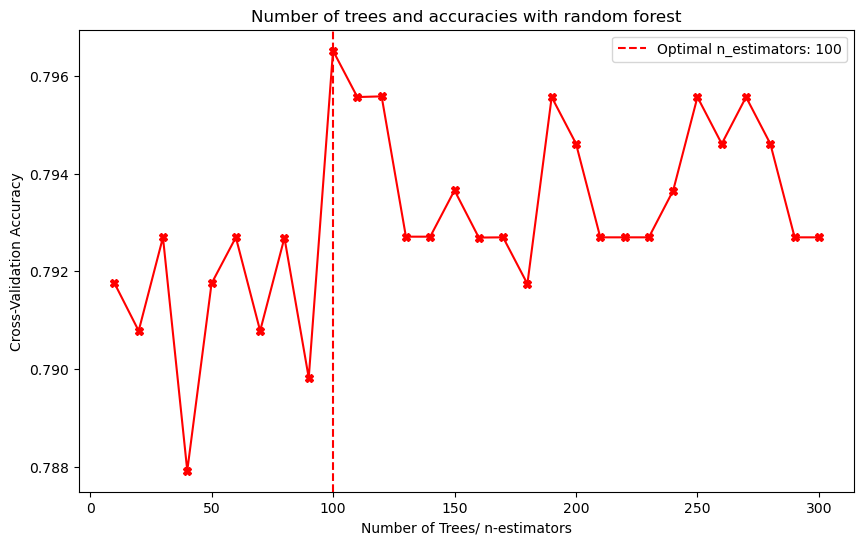

Cross validation Accuracy with the optimal number of trees : 0.7290


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd, numpy as np, matplotlib.pyplot as plt

titanicFrame= pd.read_csv("titanic3.csv")

#read the neeeded columns for fitting the decision tree model 
relevantTitanicFrame = titanicFrame[['age', 'sex', 'pclass', 'survived']]
# replace missing age values by the mean using an imputer 
dataImputer = SimpleImputer(strategy='mean')
relevantTitanicFrame['age'] = dataImputer.fit_transform(relevantTitanicFrame[['age']])
# convert categorical values to numerical values  (0 = male, 1 = female)
relevantTitanicFrame['sex'] = relevantTitanicFrame['sex'].map({'male': 0, 'female': 1})
# remove any rows with missing column or row values 
relevantTitanicFrame.dropna(inplace=True)
# define the dependent and independent data 
independentFeatures = relevantTitanicFrame[['age', 'sex', 'pclass']]
dependentFeature  = relevantTitanicFrame['survived']
# Split the dataset into training and testing sets
independentTrain, independentTest, dependentTrain, dependentTest = train_test_split(independentFeatures, dependentFeature, 
                                                                                    test_size=0.2, random_state=42)

# hyperparameter search for optimal number of trees
# define a range for the number of trees tested use the range [10, 300]
n_tree_estimators_range = range(10, 301, 10)
# initialize a list to hold cross validation scores 
cross_validation_scores = []

#iterate through the loop for the n estimators of range to find the best accuracy  
for n in n_tree_estimators_range:
    # initialize a random forest object for each possible n in the range
    random_forest_object = RandomForestClassifier(n_estimators=n, random_state=42)
    # get the cross validation score for the training and testing data 
    # use a cross validation fold of 5 
    crosscores = cross_val_score(random_forest_object, independentTrain, dependentTrain, cv=5, scoring='accuracy')
    # append to the list of cross validation scores 
    cross_validation_scores.append(crosscores.mean())

# get the number of optimal trees 
optimal_number_of_trees = n_tree_estimators_range[np.argmax(cross_validation_scores)]

print(f'Optimal number of trees is: {optimal_number_of_trees}')

# define the size of the plot figure 
plt.figure(figsize=(10, 6))
# plot the graph of accuracy against number of tree estimate '
plt.plot(n_tree_estimators_range, cross_validation_scores, marker='X', linestyle='-', color='red')
# insert the appropriate x labels
plt.xlabel('Number of Trees/ n-estimators')
# insert the appropriate y labels 
plt.ylabel('Cross-Validation Accuracy')
# insert the title of the graph 
plt.title('Number of trees and accuracies with random forest')
# display an axis line on the optimal number of trees 
plt.axvline(optimal_number_of_trees, color='r', linestyle='--', label=f'Optimal n_estimators: {optimal_number_of_trees}')
# show the legend and the plot 
plt.legend()
plt.show()

# Use the optimal number of tree estimate to construct random forest model
optimal_random_forest = RandomForestClassifier(n_estimators=optimal_number_of_trees, random_state=42)
optimal_random_forest.fit(independentTrain, dependentTrain)
cv_final_accuracy = optimal_random_forest.score(independentTest, dependentTest)

print(f"Cross validation Accuracy with the optimal number of trees : {cv_final_accuracy:.4f}")





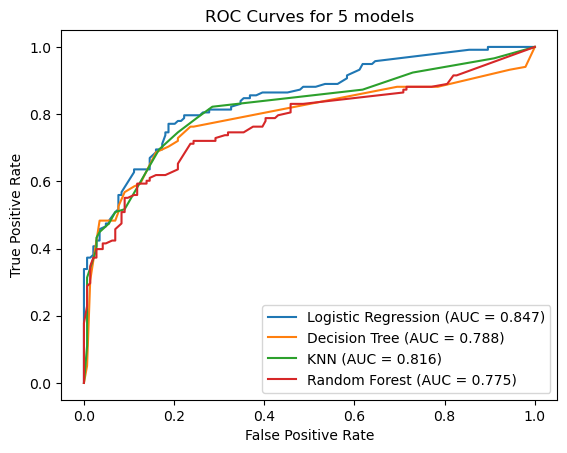

Logistic Regression AUC: 0.8466
Decision Tree AUC: 0.7882
KNN AUC: 0.8159
Random Forest AUC: 0.7752


In [6]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# scale the data using for logisitic regression and knn model
data_scaler = StandardScaler()
scaled_data_x_train = data_scaler.fit_transform(independentTrain) 
scaled_data_x_test =  data_scaler.fit_transform(independentTest)
# define the logistic regression model to use 
log_reg_model  = LogisticRegression(max_iter=1000, random_state=42)
# define the pruned decision tree classifier, use previously computed best alpha value 
dtc = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0010630758327427395)
# instantiate the KNN model using the optimal number of neighbors 
knnModel  = KNeighborsClassifier(n_neighbors=17)
# instantiate random forest model using the optimal n estimator
random_forest_model = RandomForestClassifier(n_estimators=optimal_number_of_trees, random_state=42)

model_map = {
    "Logistic Regression": log_reg_model,
    "Decision Tree": dtc,
    "KNN": knnModel,
    "Random Forest": random_forest_model
}


for name, model in model_map.items():
    # fit the different models using the test data 
    model.fit(scaled_data_x_train, dependentTrain)
    # fetch predictions from using the fitted model
    predicted_probabilities = model.predict_proba(scaled_data_x_test)[:, 1]  
    false_positive_rate, true_positive_rate, _ = roc_curve(dependentTest, predicted_probabilities)
    # use the auc function to develop the roc function 
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # label the plot and insert the appropriate label in the above
    plt.plot(false_positive_rate, true_positive_rate, label=f"{name} (AUC = {roc_auc:.3f})")

#  Plot diagonal for random guessing
# plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
# insert the xlabel 
plt.xlabel('False Positive Rate')
# insert the ylabel 
plt.ylabel('True Positive Rate')
# insert the appropriate title 
plt.title('ROC Curves for 5 models')
plt.legend(loc='lower right')
plt.show()

# Display the AUC scores for the five models
for name, model in model_map.items():
    predicted_probabilities = model.predict_proba(scaled_data_x_test)[:, 1]
    # compute the auc_score using roc_auc_score function from sklearn
    auc_score = roc_auc_score(dependentTest, predicted_probabilities)
    print(f"{name} AUC: {auc_score:.4f}")
